In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Project_11

There are 2 files to be examined here:

    1..First one Auto_Insurance_Claims_amount.csv where modelling is done to check the claim amount based on the various factors oulined below.
    
    2. Second one is about automobile insurance fraud where we are checking for the fraud status based on the factors provided.

In [67]:
df0=pd.read_csv('Auto_Insurance_Claims_amount.csv')
df0.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


# Key Observations:
    1. Columns Customer and Effective To Date does not serve purpose in predicting the Claim Amount.
    2. Also Columns Country,State and Effective To Date can be dropped as US is the only country and State code and State are related.

In [68]:
#df=df0.drop(['Customer','Country','State','Effective To Date'], axis=1)
df=df0.drop(['Country','State','Effective To Date'], axis=1)
df.head()

,Customer,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,KS,276.351928,No,Basic,Bachelor,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,697.953590,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,1288.743165,No,Premium,Bachelor,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,764.586183,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,281.369258,No,Basic,Bachelor,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [69]:
df.shape

(9134, 23)

In [70]:
# df1=pd.read_csv('Automobile_insurance_fraud.csv')
# df1.head()

In [71]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State Code                     9134 non-null   object 
 2   Claim Amount                   9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [73]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Vehicle Size                     0
Marital Status                   0
State Code                       0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Monthly Premium Auto             0
Vehicle Class                    0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Customer                         0
dtype: int64

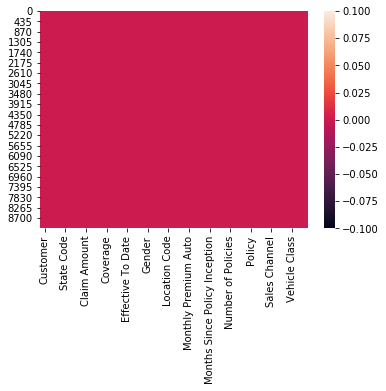

In [74]:
# Checking for null using HeatMap
sns.heatmap(df0.isnull())

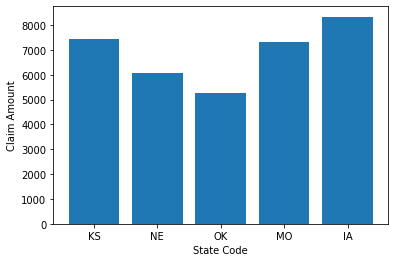

In [75]:

plt.bar(df['State Code'],df['Claim Amount'])

plt.ylabel('Claim Amount')
plt.xlabel('State Code')
plt.show()

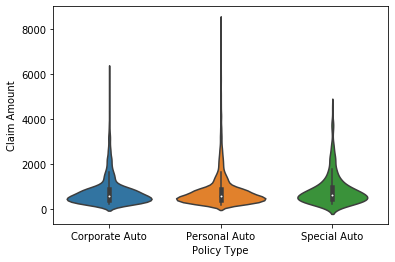

In [76]:
sns.violinplot(x='Policy Type', y='Claim Amount', data=df)

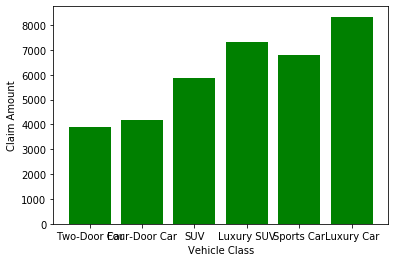

In [77]:
plt.bar(df['Vehicle Class'],df['Claim Amount'],color='g')

plt.ylabel('Claim Amount')
plt.xlabel('Vehicle Class')
plt.show()


# Key Observations:
    1. Iowa state has the highest Claim Amount followed by Kansas and Missouri.
    2. Personal Auto Policy Type has highest claims made.
    

In [78]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['Customer'] = le.fit_transform(df['Customer'])
df['State Code'] = le.fit_transform(df['State Code'])
df['Response'] = le.fit_transform(df['Response'])
df['Coverage'] = le.fit_transform(df['Coverage'])
df['Education'] = le.fit_transform(df['Education'])
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Location Code'] = le.fit_transform(df['Location Code'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['Policy Type'] = le.fit_transform(df['Policy Type'])
df['Policy'] = le.fit_transform(df['Policy'])
df['Claim Reason'] = le.fit_transform(df['Claim Reason'])

df['Sales Channel'] = le.fit_transform(df['Sales Channel'])
df['Vehicle Class'] = le.fit_transform(df['Vehicle Class'])
df['Vehicle Size'] = le.fit_transform(df['Vehicle Size'])


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   int32  
 1   State Code                     9134 non-null   int32  
 2   Claim Amount                   9134 non-null   float64
 3   Response                       9134 non-null   int32  
 4   Coverage                       9134 non-null   int32  
 5   Education                      9134 non-null   int32  
 6   EmploymentStatus               9134 non-null   int32  
 7   Gender                         9134 non-null   int32  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int32  
 10  Marital Status                 9134 non-null   int32  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [80]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[1.50430908, 0.55068994, 0.76287773, ..., 0.16963969, 1.49918077,
        0.16668206],
       [0.52318023, 0.97332215, 0.14924546, ..., 2.400737  , 0.91292371,
        0.16668206],
       [1.69545285, 1.73532819, 0.71063622, ..., 0.45573376, 1.49918077,
        0.16668206],
       ...,
       [0.80458634, 0.21131611, 0.02313483, ..., 1.22793667, 0.91292371,
        0.16668206],
       [1.00407369, 0.21131611, 0.06993547, ..., 0.88511256, 0.91292371,
        2.0278971 ],
       [1.46676298, 0.21131611, 0.78495478, ..., 0.22200449, 1.49918077,
        0.16668206]])

In [81]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [82]:
# Removing the outliers having zscore value of more than 3.
data=df[(z<3).all(axis=1)]

In [83]:
# Checking for skewed data
data.skew()

Customer                        -0.003693
State Code                       0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [84]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

data['Response']=boxcox1p(data['Response'],0.5)
data['Claim Amount']=boxcox1p(data['Claim Amount'],0.5)

data['Monthly Premium Auto']=boxcox1p(data['Monthly Premium Auto'],0.5)
data['Number of Open Complaints']=boxcox1p(data['Number of Open Complaints'],0.5)

data.skew()

Customer                        -0.003693
State Code                       0.019194
Claim Amount                     1.070565
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.976277
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.266756
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

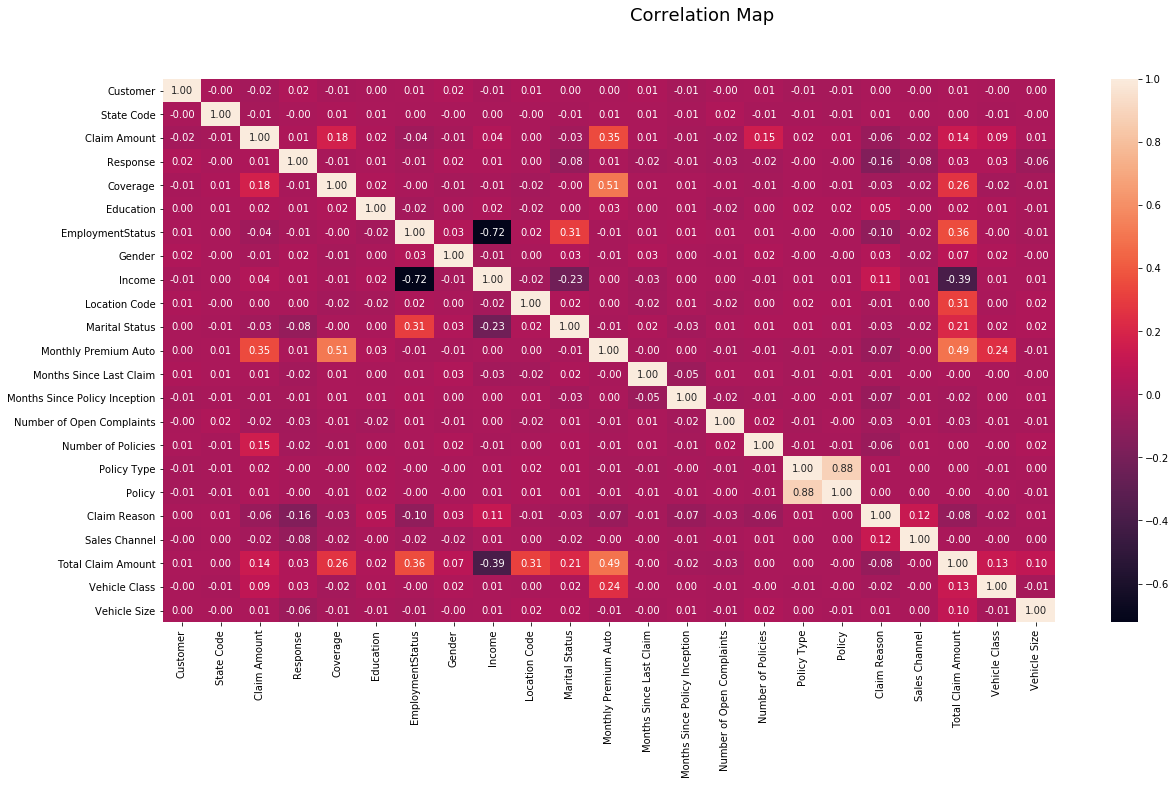

In [85]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

# Observations:
    1. Claim amount has highest correlation with Monthly Premium Auto followed by Total Claim Amount.
    2. Monthly Premium Auto is also directly proportional with Total Claim Amount.
    

In [86]:
# Setting x  by excluding Claim Amount column which is y here for prediction.
x=data.drop(['Claim Amount'],axis=1)
x

,Customer,State Code,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,600,1,0.000000,0,0,1,0,56274,1,1,...,5,0.0,1,0,2,0,0,384.811147,5,1
1,5946,3,0.000000,1,0,4,0,0,1,2,...,42,0.0,8,1,5,3,0,1131.464935,0,1
2,96,4,0.000000,2,0,1,0,48767,1,1,...,38,0.0,2,1,5,0,0,566.472247,5,1
3,8016,2,0.000000,0,0,4,1,0,1,1,...,65,0.0,7,0,1,0,2,529.881344,3,1
4,2488,1,0.000000,0,0,1,1,43836,0,2,...,44,0.0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,3857,2,0.000000,0,0,1,1,71941,2,1,...,89,0.0,2,1,3,1,3,198.234764,0,1
9130,5390,2,0.828427,1,1,1,0,21604,1,0,...,28,0.0,1,0,2,0,1,379.200000,0,1
9131,6688,2,0.000000,1,0,4,1,0,1,2,...,37,2.0,2,0,1,0,1,790.784983,0,1
9132,7214,2,0.000000,1,1,1,1,21941,1,1,...,3,0.0,3,1,4,3,1,691.200000,0,0


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [88]:
# Settng Y
y=data['Claim Amount']
y

0       31.307773
1       50.875461
2       69.825989
3       53.338456
4       31.607693
          ...    
9129    94.780138
9130    33.250596
9131    55.180033
9132    52.897878
9133    30.384174
Name: Claim Amount, Length: 8470, dtype: float64

In [89]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  53  is  0.15315256876624084


In [90]:
# Setting the test x & y values and using the random state from above step which is 53.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=53)

In [91]:
train_x.shape

(6352, 22)

In [92]:
train_y.shape

(6352,)

In [93]:
test_x.shape

(2118, 22)

In [94]:
test_y.shape

(2118,)

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
LS = Lasso(alpha=0.001)
RD = Ridge(alpha=0.01)
EL = ElasticNet(alpha=0.001)
RF = RandomForestRegressor(n_estimators=200,random_state=92)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [97]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EL))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [98]:
Model=[]
score=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 13.506263137370988
Mean squared error 305.47520817455944
Root Mean absolute error 17.477849071741048
Score:  0.1123686431171883


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 13.506263137370988
Mean squared error 305.47520817455944
Root Mean absolute error 17.477849071741048
Score:  0.06962279969538288


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 13.506263137370988
Mean squared error 305.47520817455944
Root Mean absolute error 17.477849071741048
Score:  0.14189403119797295


---

In [99]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,11.236864
1,SVR,6.962280
2,LinearRegression,14.189403
3,DecisionTreeRegressor,73.443880
4,Lasso,14.188457
5,Ridge,14.189373
6,ElasticNet,14.176358
7,RandomForestRegressor,84.031443
8,AdaBoostRegressor,78.733744
9,GradientBoostingRegressor,83.334128


# From the above RandomForestRegressor seems to be the best model with over 84% accuracy.

In [100]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
data.to_csv('ClaimPredict.csv')
predictData

,0
0,54.288676
1,29.956308
2,33.129109
3,36.952472
4,45.478654
...,...
2113,45.564630
2114,43.291245
2115,61.464564
2116,42.595193


In [101]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_insuranceClaimAmount.pkl")

['RF_insuranceClaimAmount.pkl']

# Part II

Automobile insurance fraud

In [102]:
df1=pd.read_csv('Automobile_insurance_fraud.csv')
df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [103]:
df1.shape

(1000, 40)

In [104]:
df1.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Key Observations:
    1. Columns policy_bind_ate and _c39,incident_date does not serve purpose in predicting the reported frauds.
    2. These columns can be dropped.
    3. police_report_available,property_damage,collision_type has '?' which needs to be replaced.

In [105]:
df_new=df1.drop(['policy_bind_date','_c39','incident_date'], axis=1)
df_new.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [107]:
# Checking which all columns have null values
df_new.isnull().sum().sort_values(ascending=False)

fraud_reported                 0
collision_type                 0
capital-loss                   0
capital-gains                  0
insured_relationship           0
insured_hobbies                0
insured_occupation             0
insured_education_level        0
insured_sex                    0
insured_zip                    0
umbrella_limit                 0
policy_annual_premium          0
policy_deductable              0
policy_csl                     0
policy_state                   0
policy_number                  0
age                            0
incident_type                  0
incident_severity              0
auto_year                      0
authorities_contacted          0
auto_model                     0
auto_make                      0
vehicle_claim                  0
property_claim                 0
injury_claim                   0
total_claim_amount             0
police_report_available        0
witnesses                      0
bodily_injuries                0
property_d

In [108]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df_new['policy_state'] = le.fit_transform(df_new['policy_state'])
df_new['policy_csl'] = le.fit_transform(df_new['policy_csl'])
df_new['insured_sex'] = le.fit_transform(df_new['insured_sex'])
df_new['insured_education_level'] = le.fit_transform(df_new['insured_education_level'])
df_new['insured_occupation'] = le.fit_transform(df_new['insured_occupation'])
df_new['insured_hobbies'] = le.fit_transform(df_new['insured_hobbies'])
df_new['insured_relationship'] = le.fit_transform(df_new['insured_relationship'])
df_new['incident_type'] = le.fit_transform(df_new['incident_type'])

df_new['collision_type'] = le.fit_transform(df_new['collision_type'])
df_new['incident_severity'] = le.fit_transform(df_new['incident_severity'])
df_new['authorities_contacted'] = le.fit_transform(df_new['authorities_contacted'])
df_new['incident_state'] = le.fit_transform(df_new['incident_state'])
df_new['incident_city'] = le.fit_transform(df_new['incident_city'])
df_new['incident_location'] = le.fit_transform(df_new['incident_location'])
df_new['property_damage'] = le.fit_transform(df_new['property_damage'])
df_new['police_report_available'] = le.fit_transform(df_new['police_report_available'])

df_new['auto_make'] = le.fit_transform(df_new['auto_make'])
df_new['auto_model'] = le.fit_transform(df_new['auto_model'])
df_new['fraud_reported'] = le.fit_transform(df_new['fraud_reported'])


In [109]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

In [110]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df_new))
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.79152739, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.04786687, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [111]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 31,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [112]:
# Removing the outliers having zscore value of more than 3.
fraud_data=df_new[(z<3).all(axis=1)]
fraud_data.shape

(980, 37)

In [113]:
# Checking for skewed data
fraud_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725


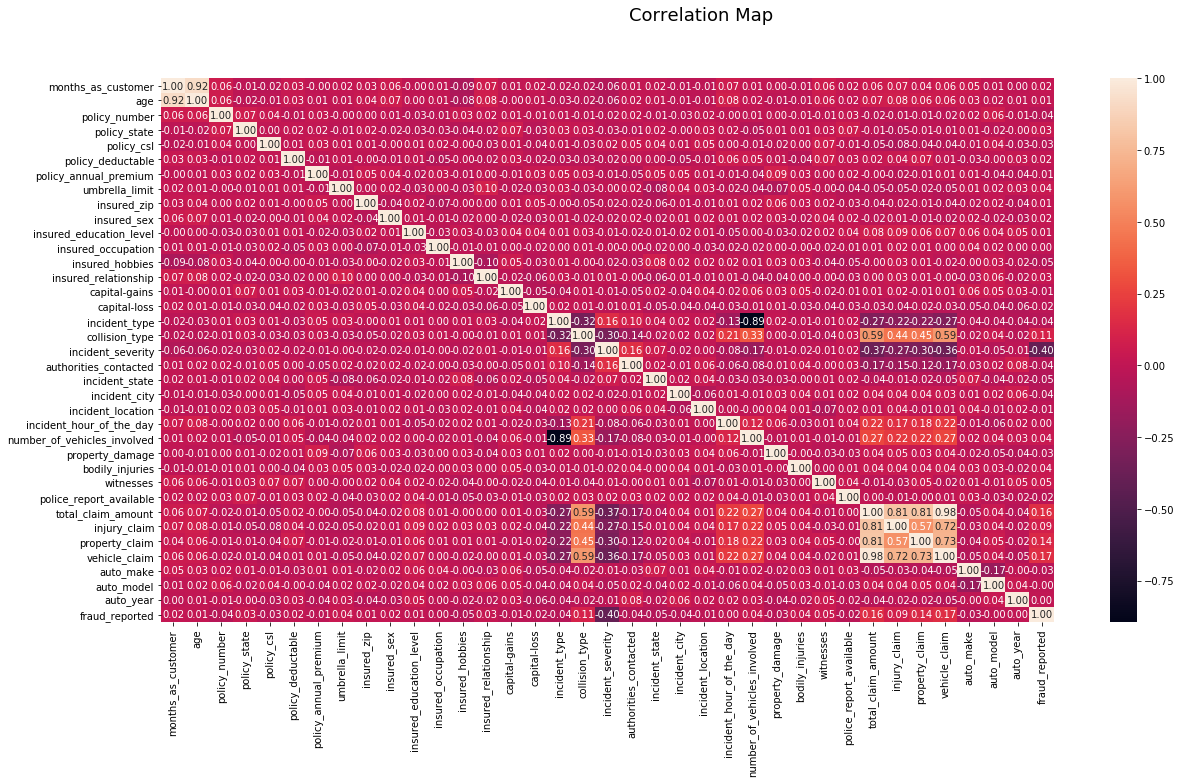

In [114]:
plt.figure(figsize=(20,10)) 
sns.heatmap(fraud_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [115]:
# Setting x  by excluding fraud_reported column which is y here for prediction.
x=fraud_data.drop(['fraud_reported'],axis=1)
x

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,0,1,2,46980,5220,5220,36540,1,5,1998


In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [117]:
# Settng Y
y=fraud_data['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int32

In [118]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  80  is  0.8244897959183674


In [119]:
# Setting the test x & y values and using the random state from above step which is 80.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=80)

In [120]:
train_x.shape

(735, 36)

In [121]:
train_y.shape

(735,)

In [122]:
test_x.shape

(245, 36)

In [123]:
test_y.shape

(245,)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
KNN=KNeighborsClassifier(n_neighbors=13)
SV=SVC(kernel="linear", C=1)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='entropy',max_depth=4)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=10)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=10)

In [126]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [127]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
Accuracy Score:  0.8
Cross_Val_Score:  0.7479591836734694
[[189   5]
 [ 44   7]]


-------------- SVC --------------
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.7918367346938775
Cross_Val_Score:  0.7530612244897958
[[194   0]
 [ 51   0]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=No

In [128]:
result=pd.DataFrame({"Model": Model, "Score": score, "Cross Val Score":cvs})
result

,Model,Score,Cross Val Score
0,KNeighborsClassifier,80.000000,74.795918
1,SVC,79.183673,75.306122
2,LogisticRegression,82.448980,76.836735
3,DecisionTreeClassifier,86.122449,83.775510
4,GaussianNB,71.428571,71.530612
5,RandomForestClassifier,82.040816,76.734694
6,AdaBoostClassifier,80.000000,80.714286
7,GradientBoostingClassifier,83.265306,82.755102


# From the above table GradientBoostingRegressor seems to be the best model with over 83% accuracy.

In [129]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
fraud_data.to_csv('FraudPredict.csv')
predictData

,0
0,1
1,0
2,0
3,0
4,1
...,...
240,0
241,1
242,0
243,0


In [130]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(GBC,"GBC_insuranceFraud.pkl")

['GBC_insuranceFraud.pkl']